In [1]:
! conda install -y nb_conda



Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /home/mathiane/miniconda3

  added / updated specs:
    - nb_conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    argon2-cffi-20.1.0         |   py38h27cfd23_1          46 KB
    ca-certificates-2021.5.25  |       h06a4308_1         112 KB
    conda-4.10.1               |   py38h06a4308_1         2.9 MB
    importlib-metadata-3.10.0  |   py38h06a4308_0          33 KB
    ipython-7.22.0             |   py38hb070fc8_0         982 KB
    jupyter_core-4.7.1         |   py38h06a4308_0          68 KB
    markupsafe-2.0.1           |   py38h27cfd23_0          22 KB
    nb_conda-2.2.1             |           py38_1          33 KB
   

In [4]:
!conda info | grep 'active env'

     active environment : base
    active env location : /home/mathiane/miniconda3


In [5]:
! pip install environment_kernels

  Created wheel for environment-kernels: filename=environment_kernels-1.1.1-py3-none-any.whl size=30796 sha256=a33cd38f123ac118e51927705f1ac7bc556f059feb505b6a56cc1280c304045a
  Stored in directory: /home/mathiane/.cache/pip/wheels/d4/c6/ff/26eeec379303ffaf71ba975be8cc13e646c4ea601fb2c5bde6
Successfully built environment-kernels


In [8]:
! conda install -c -y anaconda ipykernel

usage: conda install [-h] [--revision REVISION] [-n ENVIRONMENT | -p PATH]
                     [-c CHANNEL] [--use-local] [--override-channels]
                     [--repodata-fn REPODATA_FNS] [--strict-channel-priority]
                     [--no-channel-priority] [--no-deps | --only-deps]
                     [--no-pin] [--copy] [-C] [-k] [--offline] [-d] [--json]
                     [-q] [-v] [-y] [--download-only] [--show-channel-urls]
                     [--file FILE] [--force-reinstall]
                     [--freeze-installed | --update-deps | -S | --update-all | --update-specs]
                     [-m] [--clobber] [--dev]
                     [package_spec [package_spec ...]]
conda install: error: argument -c/--channel: expected one argument


In [6]:
! conda activate ImgProcess


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [ ]:
#python -m ipykernel install --user --name ex --display-name "Python (ex)"


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_convergence = pd.read_csv('Res_demo/convergence.csv')

In [3]:
df_convergence.head()

,epoch,metric,value
0,1,loss,1.232626
1,1,error,0.500000
2,1,fpr,1.000000
3,1,fnr,0.000000
4,2,loss,0.659379


In [6]:
df_loss = df_convergence[df_convergence['metric'] == 'loss' ]

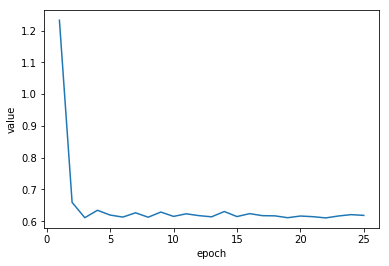

In [8]:
sns.lineplot(x=df_loss['epoch'], y=df_loss['value'], hue=None, size=None, style=None, data=df_loss)

In [10]:
df_error = df_convergence[df_convergence['metric'] == 'error' ]

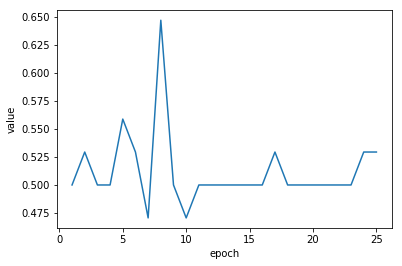

In [11]:
sns.lineplot(x=df_error['epoch'], y=df_error['value'], hue=None, size=None, style=None, data=df_error)

In [12]:
df_error = df_convergence[df_convergence['metric'] == 'fpr' ]

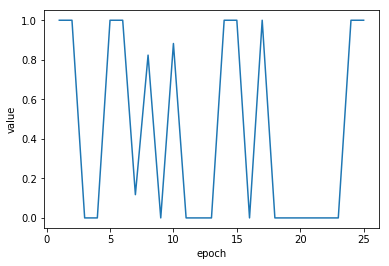

In [13]:
sns.lineplot(x=df_error['epoch'], y=df_error['value'], hue=None, size=None, style=None, data=df_error)

In [14]:
df_error = df_convergence[df_convergence['metric'] == 'fnr' ]

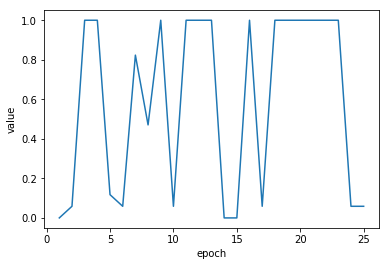

In [15]:
sns.lineplot(x=df_error['epoch'], y=df_error['value'], hue=None, size=None, style=None, data=df_error)

In [19]:
df_FPR_FNR = df_convergence[(df_convergence['metric'] == 'fpr') | (df_convergence['metric'] == 'fnr') ]

In [20]:
df_FPR_FNR.head()

,epoch,metric,value
2,1,fpr,1.000000
3,1,fnr,0.000000
6,2,fpr,1.000000
7,2,fnr,0.058824
10,3,fpr,0.000000


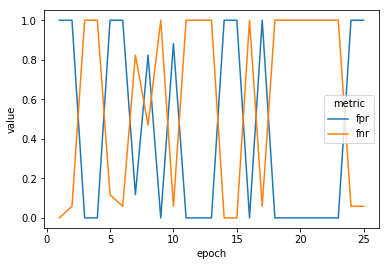

In [23]:
sns.lineplot(x=df_FPR_FNR['epoch'], y=df_FPR_FNR['value'], hue='metric', size=None, style=None, data=df_FPR_FNR)

In [24]:
### Show prediction 

In [106]:
df_proba_sample = pd.read_csv('Res_demo/probability.csv')

In [130]:
df_proba_sample[df_proba_sample.index == 'TNE0075'].shape

(311, 3)

In [118]:
# Get the 5 tiles per slides with the highest_proba to be atypical
def tiles_highest_atypical_scores(df_proba_sample):
    sample = set(df_proba_sample.index)
    dict_sample_tiles_scores = {}
    for s in sample:
        print('SAMPLE  ', s)
        dict_sample_tiles_scores[s] = []
        sub_df = df_proba_sample[df_proba_sample.index == s]
        sub_df = sub_df.sort_values(by=['probability'], ascending = False)
        top_tiles =  sub_df.iloc[:5, 0]
        top_scores  =  sub_df.iloc[:5, -1]
        dict_sample_tiles_scores[s].append({'TopTiles' : top_tiles })
        dict_sample_tiles_scores[s].append({'TopScores' : top_scores })
        dict_sample_tiles_scores[s].append({'Targets' : sub_df.iloc[0, 1] })
    return dict_sample_tiles_scores
        

In [119]:
dict_sample_tiles_scores_ATYPICAL  = tiles_highest_atypical_scores(df_proba_sample)

SAMPLE   TNE0519
SAMPLE   TNE1422
SAMPLE   TNE0521
SAMPLE   TNE0289
SAMPLE   TNE2141
SAMPLE   TNE0075
SAMPLE   TNE1413
SAMPLE   TNE1414
SAMPLE   TNE1017
SAMPLE   TNE1410
SAMPLE   TNE1365
SAMPLE   TNE1411
SAMPLE   TNE1086
SAMPLE   TNE0952
SAMPLE   TNE1456
SAMPLE   TNE0288
SAMPLE   TNE1338
SAMPLE   TNE1095
SAMPLE   TNE0522
SAMPLE   TNE0985
SAMPLE   TNE0286
SAMPLE   TNE1450
SAMPLE   TNE0944
SAMPLE   TNE0520
SAMPLE   TNE1430
SAMPLE   TNE1099
SAMPLE   TNE0810
SAMPLE   TNE2142
SAMPLE   TNE0287
SAMPLE   TNE1024
SAMPLE   TNE0974
SAMPLE   TNE0408
SAMPLE   TNE1080
SAMPLE   TNE0002


In [120]:
dict_sample_tiles_scores_ATYPICAL

{'TNE0519': [{'TopTiles': TNE0519    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE0519    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE0519    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE0519    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE0519    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   Name: Tiles, dtype: object},
  {'TopScores': TNE0519    0.591377
   TNE0519    0.590948
   TNE0519    0.589881
   TNE0519    0.589820
   TNE0519    0.587192
   Name: probability, dtype: float64},
  {'Targets': 1}],
 'TNE1422': [{'TopTiles': TNE1422    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE1422    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE1422    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE1422    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE1422    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   Name: Tiles, dtype: object},
  {'TopScores': TNE1422    0.591377
   TNE1422    0.590948
   TN

In [121]:
# Get the 5 tiles per slides with the highest_proba to be atypical
def tiles_highest_typical_scores(df_proba_sample):
    sample = set(df_proba_sample.index)
    dict_sample_tiles_scores = {}
    for s in sample:
        print('SAMPLE  ', s)
        dict_sample_tiles_scores[s] = []
        sub_df = df_proba_sample[df_proba_sample.index == s]
        sub_df = sub_df.sort_values(by=['probability'], ascending = True)
        top_tiles =  sub_df.iloc[:5, 0]
        top_scores  =  sub_df.iloc[:5, -1]
        dict_sample_tiles_scores[s].append({'TopTiles' : top_tiles })
        dict_sample_tiles_scores[s].append({'TopScores' : top_scores })
        dict_sample_tiles_scores[s].append({'Targets' : sub_df.iloc[0, 1] })
    return dict_sample_tiles_scores
        

In [122]:
dict_sample_tiles_scores_TYPICAL  = tiles_highest_typical_scores(df_proba_sample)

SAMPLE   TNE0519
SAMPLE   TNE1422
SAMPLE   TNE0521
SAMPLE   TNE0289
SAMPLE   TNE2141
SAMPLE   TNE0075
SAMPLE   TNE1413
SAMPLE   TNE1414
SAMPLE   TNE1017
SAMPLE   TNE1410
SAMPLE   TNE1365
SAMPLE   TNE1411
SAMPLE   TNE1086
SAMPLE   TNE0952
SAMPLE   TNE1456
SAMPLE   TNE0288
SAMPLE   TNE1338
SAMPLE   TNE1095
SAMPLE   TNE0522
SAMPLE   TNE0985
SAMPLE   TNE0286
SAMPLE   TNE1450
SAMPLE   TNE0944
SAMPLE   TNE0520
SAMPLE   TNE1430
SAMPLE   TNE1099
SAMPLE   TNE0810
SAMPLE   TNE2142
SAMPLE   TNE0287
SAMPLE   TNE1024
SAMPLE   TNE0974
SAMPLE   TNE0408
SAMPLE   TNE1080
SAMPLE   TNE0002


In [123]:
dict_sample_tiles_scores_TYPICAL

{'TNE0519': [{'TopTiles': TNE0519    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE0519    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE0519    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE0519    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE0519    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   Name: Tiles, dtype: object},
  {'TopScores': TNE0519    0.172819
   TNE0519    0.197262
   TNE0519    0.198553
   TNE0519    0.203916
   TNE0519    0.226521
   Name: probability, dtype: float64},
  {'Targets': 1}],
 'TNE1422': [{'TopTiles': TNE1422    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE1422    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE1422    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE1422    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   TNE1422    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   Name: Tiles, dtype: object},
  {'TopScores': TNE1422    0.172819
   TNE1422    0.197262
   TN

In [125]:
import os
import shutil
def move_best__tiles(dict_sample_tiles_scores, outputdir, best_atypical = True):
    try:
        os.mkdir(outputdir)
    except:
        print('Outputdir already created ')
    for sample in dict_sample_tiles_scores.keys():
        sample_info = dict_sample_tiles_scores[sample]
        target_sample =  sample_info[2]['Targets']
        try:
            os.mkdir(os.path.join(outputdir,sample + '_'+ str(target_sample)))
        except:
            print('sample folder already created ')
        
        
        if best_atypical:
            histo_type = 'Atypical'
            try:
                os.mkdir(os.path.join(outputdir,sample + '_'+ str(target_sample), histo_type))
            except:
                print('sample folder already created ')
        else:
            histo_type = 'Typical'
            try:
                os.mkdir(os.path.join(outputdir,sample + '_'+ str(target_sample), histo_type))
            except:
                print('sample folder already created ')
            
        tiles = sample_info[0]['TopTiles']
        probs = sample_info[1]['TopScores']
        for tile, prob in zip(tiles, probs):
            tile_names = tile.split('/')[-1].split('.')[0]
            outputname = tile_names + '__' + str(round(prob*100)) + '.'+ tile.split('/')[-1].split('.')[1]
            print(outputname)
            shutil.copy(tile, os.path.join(outputdir ,sample + '_'+ str(target_sample), histo_type,outputname))


In [126]:
move_best__tiles(dict_sample_tiles_scores_ATYPICAL, 'BestSortTilesVal', best_atypical = True)

TNE0519_90553_10165__59.jpg
TNE0519_86857_36037__59.jpg
TNE0519_55441_79465__59.jpg
TNE0519_38809_92863__59.jpg
TNE0519_42967_89167__59.jpg
TNE1422_14785_56365__59.jpg
TNE1422_19405_51745__59.jpg
TNE1422_39733_17557__59.jpg
TNE1422_45277_10165__59.jpg
TNE1422_14785_38809__59.jpg
TNE0521_34189_92863__59.jpg
TNE0521_11551_53131__56.jpg
TNE0521_20329_99331__56.jpg
TNE0521_8779_77617__53.jpg
TNE0521_11089_53131__51.jpg
TNE0289_43429_75307__61.jpg
TNE0289_33265_60985__60.jpg
TNE0289_9241_78079__60.jpg
TNE0289_8779_95173__60.jpg
TNE0289_26335_74845__59.jpg
TNE2141_71149_29569__59.jpg
TNE2141_60061_34189__59.jpg
TNE2141_50821_34189__59.jpg
TNE2141_54517_19405__59.jpg
TNE2141_42505_56365__59.jpg
TNE0075_27721_25873__59.jpg
TNE0075_49897_36961__59.jpg
TNE0075_34189_42505__59.jpg
TNE0075_7393_60061__57.jpg
TNE0075_49897_22177__56.jpg
TNE1413_85009_45277__59.jpg
TNE1413_77617_25873__59.jpg
TNE1413_85933_34189__59.jpg
TNE1413_84085_26797__59.jpg
TNE1413_34189_37885__59.jpg
TNE1414_27721_36037__59.

In [127]:
move_best__tiles(dict_sample_tiles_scores_TYPICAL, 'BestSortTilesVal', best_atypical = False)

Outputdir already created 
sample folder already created 
TNE0519_24487_63295__17.jpg
TNE0519_17095_82699__20.jpg
TNE0519_54979_66067__20.jpg
TNE0519_30493_54055__20.jpg
TNE0519_81313_59137__23.jpg
sample folder already created 
TNE1422_47125_27721__17.jpg
TNE1422_53593_42505__20.jpg
TNE1422_46201_36961__20.jpg
TNE1422_53593_29569__23.jpg
TNE1422_50821_47125__23.jpg
sample folder already created 
TNE0521_4159_50821__31.jpg
TNE0521_43429_96097__33.jpg
TNE0521_32803_83161__34.jpg
TNE0521_12937_56827__34.jpg
TNE0521_30493_81313__34.jpg
sample folder already created 
TNE0289_19405_48511__17.jpg
TNE0289_38809_69301__18.jpg
TNE0289_45739_97483__18.jpg
TNE0289_7393_87319__18.jpg
TNE0289_17095_72997__20.jpg
sample folder already created 
TNE2141_34189_65605__17.jpg
TNE2141_34189_24949__20.jpg
TNE2141_61909_16633__20.jpg
TNE2141_12013_19405__23.jpg
TNE2141_56365_22177__23.jpg
sample folder already created 
TNE0075_87781_20329__17.jpg
TNE0075_65605_13861__20.jpg
TNE0075_22177_12937__27.jpg
TNE00

In [128]:
## Draw map